In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from knn_classifier import KNNClassifier
from train_test_split import train_test_split
from scaler import MinMaxScaler, StandardScaler, RobustScaler
from metric import accuracy, f1_score

In [2]:
df = pd.read_csv("data/spam.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


In [4]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    print(f"\nTrain with {scaler_name}:")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    k_values = range(1, 16)
    acc_scores = []
    f1_scores = []

    for k in k_values:
        knn = KNNClassifier(k, 3)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        acc_scores.append(accuracy(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    results[scaler_name] = {
        "k_values": k_values,
        "accuracy": acc_scores,
        "f1_score": f1_scores,
        "best_k": k_values[np.argmax(acc_scores)],
        "best_accuracy": max(acc_scores),
        "best_f1": max(f1_scores)
    }

    print(f"Best k: {results[scaler_name]['best_k']}, Accuracy: {results[scaler_name]['best_accuracy']:.4f}, F1-score: {results[scaler_name]['best_f1']:.4f}")


Train with MinMaxScaler:
Best k: 3, Accuracy: 0.9101, F1-score: 0.9029

Train with StandardScaler:
Best k: 7, Accuracy: 0.9145, F1-score: 0.9079

Train with RobustScaler:
Best k: 7, Accuracy: 0.9174, F1-score: 0.9108


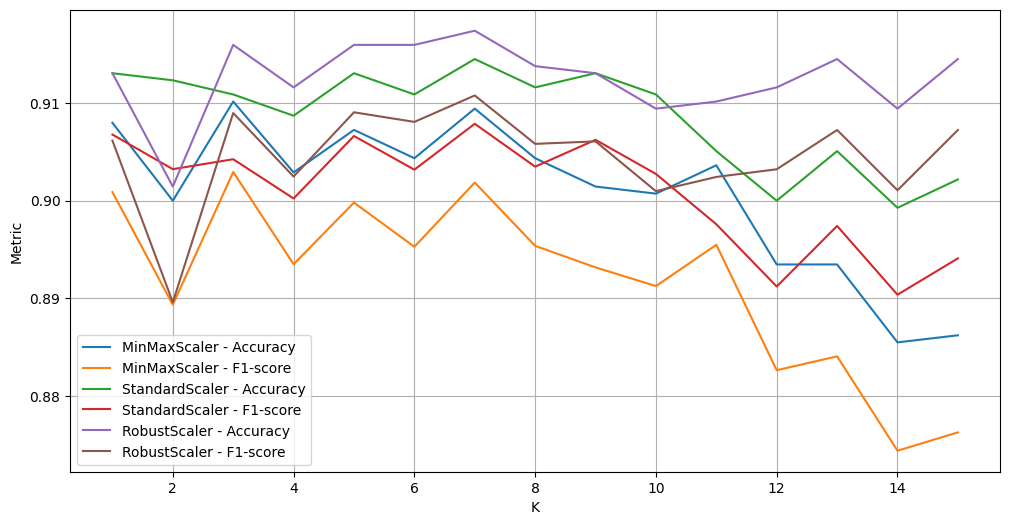

In [5]:
plt.figure(figsize=(12, 6))

for scaler_name, data in results.items():
    plt.plot(data["k_values"], data["accuracy"], label=f"{scaler_name} - Accuracy")
    plt.plot(data["k_values"], data["f1_score"], label=f"{scaler_name} - F1-score")

plt.xlabel("K")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.show()